### Name : Rishi Jain
### Email : rj1016743@gmail.com , rishijainai262003@gmail.com
### Codalab Username : Rishi_Jain

#### Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df = pd.read_csv('/content/Tweets_data.csv')

In [6]:
df.head()

,Id,Tweet,Emotion,Score
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [7]:
df['Emotion'].unique() # Finding Unique Words in emotion column

array(['anger', 'fear', 'joy', 'sadness'], dtype=object)

In [8]:
labels_dict = {'sadness':0 ,'joy':1, 'anger':2, 'fear':3} # Mapping emotions with integral value
df['label'] = df['Emotion'].map(labels_dict)

In [9]:
df.head()

,Id,Tweet,Emotion,Score,label
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,2
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,2
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,2
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,2
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7097 entries, 0 to 7096
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       7097 non-null   int64  
 1   Tweet    7097 non-null   object 
 2   Emotion  7097 non-null   object 
 3   Score    7097 non-null   float64
 4   label    7097 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 277.4+ KB


In [11]:
df.duplicated().sum() # Checking duplicate items

0

### Data Visualization

<Axes: xlabel='count', ylabel='Emotion'>

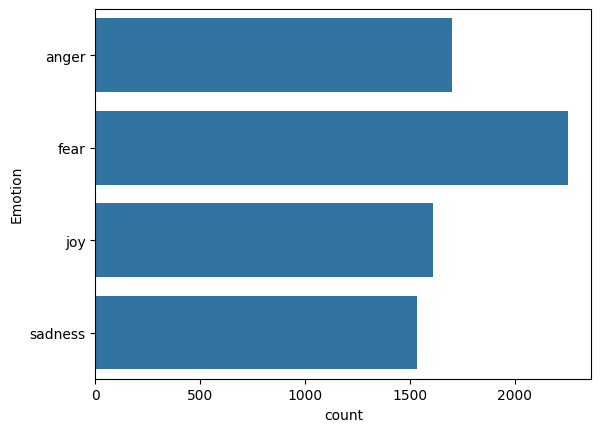

In [12]:
sns.countplot(df['Emotion'])

### Preprocessing

In [13]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Obtain a list of separated words from the sentence
    text_split = text.split()
    # Construct a new list with stop words removed
    words_nostop = [w for w in text_split if w not in stop_words]
    # Re-join the words
    return " ".join(words_nostop)


In [14]:
df['Tweet'] = df['Tweet'].apply(remove_stopwords)

In [15]:
df.head()

,Id,Tweet,Emotion,Score,label
0,10000,How fu*k! Who heck! moved fridge!... I knock l...,anger,0.938,2
1,10001,So Indian Uber driver called someone N word. I...,anger,0.896,2
2,10002,@DPD_UK I asked parcel delivered pick store ad...,anger,0.896,2
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,2
4,10004,"Don't join @BTCare put phone you, talk rude. T...",anger,0.896,2


In [16]:
X_train , X_test , Y_train , Y_test = train_test_split(df['Tweet'] , df['label'] , train_size = 0.8 , random_state = 100 , stratify = df['label'])

In [17]:
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()
Y_train = Y_train.values
Y_test = Y_test.values

In [18]:
tokenizer = Tokenizer(oov_token = 'nothing')
tokenizer.fit_on_texts(X_train)

In [19]:
length = len(tokenizer.word_index)
length

15126

In [20]:
tokenizer.document_count

5677

In [21]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [22]:
max_len = max(max(len(seq) for seq in X_train_seq) , max(len(seq) for seq in X_test_seq))

In [23]:
max_len

26

In [24]:
# Padding the Sequence
X_train = pad_sequences(X_train_seq, maxlen = max_len , padding = "pre")
X_test = pad_sequences(X_test_seq, maxlen = max_len , padding = "pre")

In [25]:
X_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  102,
         32,   79, 1480, 3553,   29, 1038,  197,  128,  252,  208,  269,
          4, 2097,    2,  612], dtype=int32)

#### Model

In [38]:
# Model Making
model = Sequential([
    Embedding(input_dim=length + 2, output_dim=100, input_length=max_len),
    Bidirectional(LSTM(30,return_sequences = True)),
    Bidirectional(LSTM(30)),
    Dense(4,activation='softmax')
])

In [39]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 26, 100)           1512800   
                                                                 
 bidirectional_4 (Bidirecti  (None, 26, 60)            31440     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 60)                21840     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 4)                 244       
                                                                 
Total params: 1566324 (5.98 MB)
Trainable params: 1566324 (5.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Model Train
history = model.fit(X_train, Y_train, epochs=2 ,verbose=2, validation_split= 0.2 , callbacks =[tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 2)] )

Epoch 1/2
142/142 - 20s - loss: 1.1781 - accuracy: 0.4455 - val_loss: 0.7737 - val_accuracy: 0.6893 - 20s/epoch - 143ms/step
Epoch 2/2
142/142 - 14s - loss: 0.3231 - accuracy: 0.8994 - val_loss: 0.5626 - val_accuracy: 0.8275 - 14s/epoch - 100ms/step


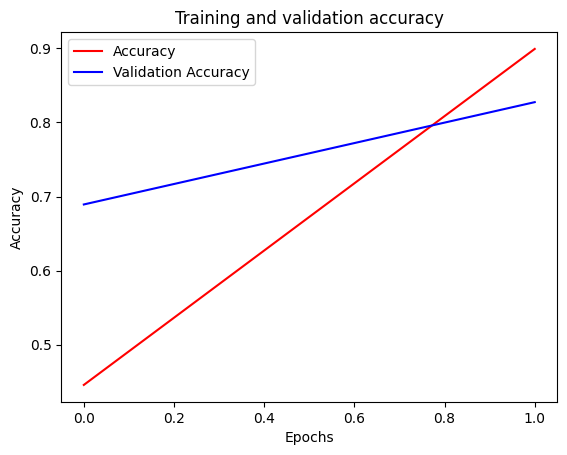

In [41]:
epochs = [*range(2)]

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

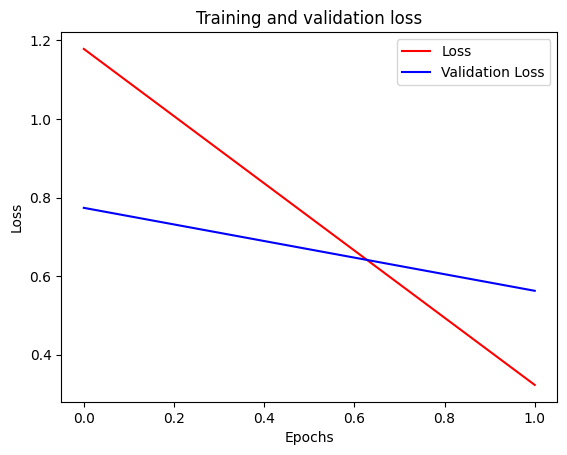

In [42]:
epochs = [*range(2)]

acc = history.history['loss']
val_acc = history.history['val_loss']
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

#### Classification report

In [43]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print("Classification report:\n", classification_report(Y_test, y_pred))

45/45 [==============================] - 2s 20ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       307
           1       0.80      0.93      0.86       322
           2       0.85      0.83      0.84       340
           3       0.91      0.80      0.85       451

    accuracy                           0.84      1420
   macro avg       0.84      0.84      0.84      1420
weighted avg       0.84      0.84      0.84      1420

